# Låt oss försöka se vilka som överlever titanic!

Vi skriver en beskrivning på vad vi ska göra i våran notebook! Vi vill hitta dem som dog helt enkelt, varför??

### Importera nödvändiga bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Läser in nödvändig data

In [2]:
df = pd.read_csv('train_titanic.csv')

### Analys av data
Vi finner att endast Pclass, Sex, Age och Fare bör kunna bidra till vår modell av den anledningen bla bla bal....

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
len(df['Fare'].unique())

248

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
new_df = df[['Pclass', 'Sex', 'Age', 'Fare','Survived']]
#dom som kan bidra till våran modell

In [9]:
new_df.loc[new_df['Age'].isnull()].describe()

,Pclass,Age,Fare,Survived
count,177.000000,0.0,177.000000,177.000000
mean,2.598870,NaN,22.158567,0.293785
std,0.763216,NaN,31.874608,0.456787
min,1.000000,NaN,0.000000,0.000000
25%,3.000000,NaN,7.750000,0.000000
50%,3.000000,NaN,8.050000,0.000000
75%,3.000000,NaN,24.150000,1.000000
max,3.000000,NaN,227.525000,1.000000


In [10]:
new_df.loc[new_df['Age'].isnull()]['Pclass'].value_counts()

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [11]:
new_df.loc[~new_df['Age'].isnull()].describe()

,Pclass,Age,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,34.694514,0.406162
std,0.838250,14.526497,52.918930,0.491460
min,1.000000,0.420000,0.000000,0.000000
25%,1.000000,20.125000,8.050000,0.000000
50%,2.000000,28.000000,15.741700,0.000000
75%,3.000000,38.000000,33.375000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [12]:
new_df.loc[~new_df['Age'].isnull()]['Pclass'].value_counts()

Pclass
3    355
1    186
2    173
Name: count, dtype: int64

In [13]:
new_df.describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [14]:
new_df.dropna(inplace=True)

C:\Users\mrahi\AppData\Local\Temp\ipykernel_25360\1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [15]:
new_df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [16]:
new_df['Sex'] = new_df['Sex'].replace({'male':0,'female':1})

C:\Users\mrahi\AppData\Local\Temp\ipykernel_25360\4199707641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sex'] = new_df['Sex'].replace({'male':0,'female':1})


In [17]:
new_df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


### Träning av modell!

In [18]:
cls = DecisionTreeClassifier(random_state=42)

X = new_df[['Pclass','Sex','Age','Fare']]
y = new_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

cls.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Noggrannhet: 0.77


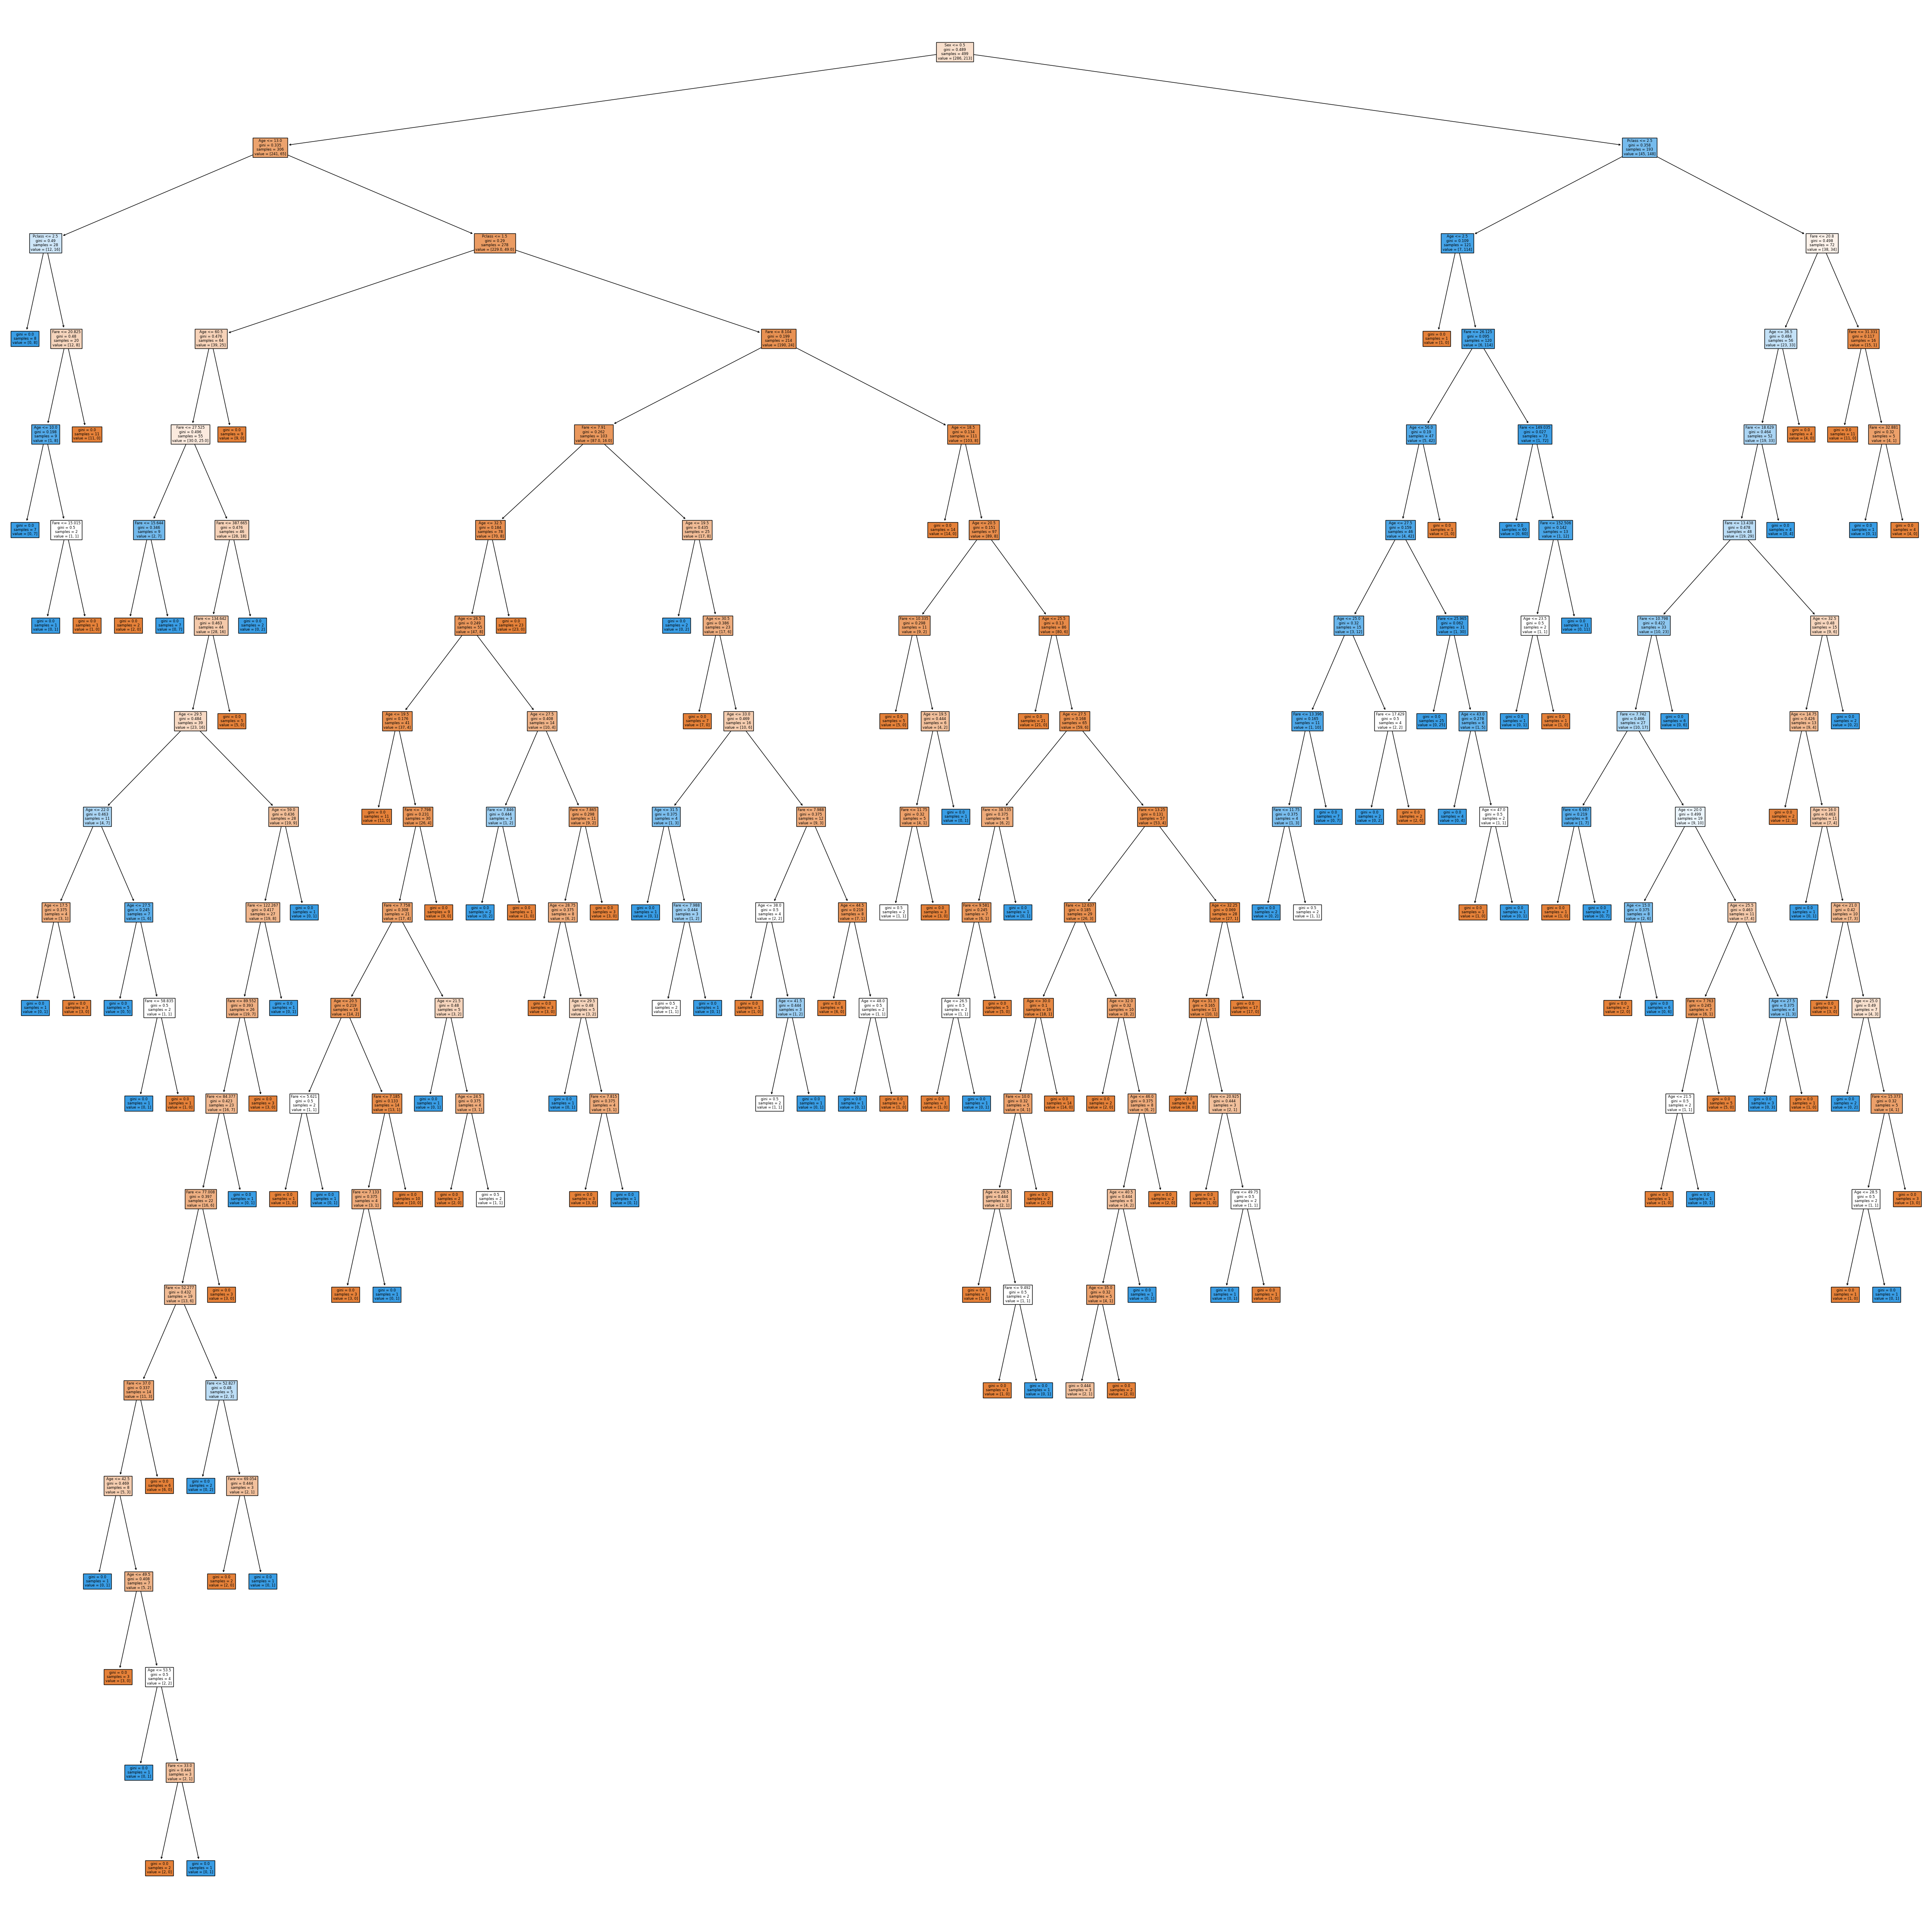

In [19]:
# Gör förutsägelser med testdatan
y_pred = cls.predict(X_test)

# Beräkna och skriv ut noggrannheten
accuracy = accuracy_score(y_test, y_pred)
print(f'Noggrannhet: {accuracy:.2f}')

# Plotta beslutsträdet
plt.figure(figsize=(60,60))
plot_tree(cls, filled=True, feature_names=['Pclass','Sex','Age','Fare'])
plt.show()